In [18]:
import torch
from torch import nn
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
from torchvision import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision.transforms as transforms
import os

In [19]:
torch.cuda.is_available()

True

In [20]:
os.environ['CUDA_VISIBLE_DEVICES'] ='0'

In [21]:
# convert data to torch.FloatTensor
image_resolution = 64
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
transform = transforms.Compose([
    transforms.Resize((image_resolution, image_resolution)),
    transforms.ToTensor()])

In [22]:
# load the training and test datasets
train_data = torchvision.datasets.ImageFolder(root='C:/Users/SWANNT/Cats and Dogs/train', transform = transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, num_workers = num_workers, shuffle = True)

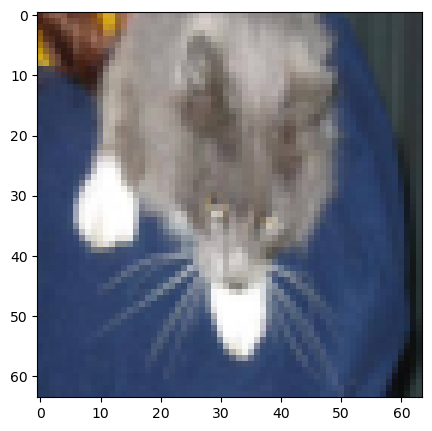

In [23]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

#get one image from the batch
img = np.squeeze(images[0])
img = img.transpose(1, 2, 0)

fig = plt.figure(figsize = (5,5)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [24]:
# define the NN architecture
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        ## encoder ##
        self.encoder = nn.Linear(3*image_resolution*image_resolution, encoding_dim)
        ## decoder ##
        self.decoder = nn.Linear(encoding_dim, 2)

    def forward(self, x):
        # define feedforward behavior 
        # and scale the *output* layer with a sigmoid activation function
        
        # pass x into encoder
        out = F.relu(self.encoder(x))
        # pass out into decoder
        out = torch.sigmoid(self.decoder(out))
        
        return out

# initialize the NN
encoding_dim = 64
device = "cuda"
model = Autoencoder(encoding_dim).to(torch.device(device))
print(model)

Autoencoder(
  (encoder): Linear(in_features=12288, out_features=64, bias=True)
  (decoder): Linear(in_features=64, out_features=2, bias=True)
)


In [25]:
# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [26]:
def get_pred_out(labels):
    rv = []
    for x in labels:
        if x == 0:
            y = [1, 0]
        elif x == 1:
            y = [0, 1]
        rv.append(y)
    return torch.Tensor(rv)

In [27]:
# number of epochs to train the model
n_epochs = 1

for epoch in range(1, n_epochs+1):
    # monitor training loss
    train_loss = 0.1
    
    ###################
    # train the model #
    ###################
    for data in train_loader:
        # _ stands in for labels, here
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        # flatten images
        images = images.view(images.size(0), -1)#.to(torch.device(device))
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        pred_out = get_pred_out(labels).to(torch.device(device))
        # forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(images)
#         print(outputs.size())
#         print(pred_out.size())
#         print(outputs)
#         print(pred_out)
        # calculate the loss
        loss = criterion(outputs, pred_out)
#         print(loss)
#         break
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)
            
    # print avg training statistics 
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch, 
        train_loss
        ))

Epoch: 1 	Training Loss: 4.951034


cat
tensor([0.8812, 0.1188], device='cuda:0', grad_fn=<SelectBackward0>)
dog
tensor([0.5372, 0.4628], device='cuda:0', grad_fn=<SelectBackward0>)
dog
tensor([0.4348, 0.5651], device='cuda:0', grad_fn=<SelectBackward0>)
dog
tensor([0.4025, 0.5975], device='cuda:0', grad_fn=<SelectBackward0>)
dog
tensor([0.7657, 0.2343], device='cuda:0', grad_fn=<SelectBackward0>)
dog
tensor([0.5079, 0.4921], device='cuda:0', grad_fn=<SelectBackward0>)
dog
tensor([0.6555, 0.3445], device='cuda:0', grad_fn=<SelectBackward0>)
dog
tensor([0.5161, 0.4839], device='cuda:0', grad_fn=<SelectBackward0>)
dog
tensor([0.2819, 0.7180], device='cuda:0', grad_fn=<SelectBackward0>)
dog
tensor([0.5638, 0.4362], device='cuda:0', grad_fn=<SelectBackward0>)


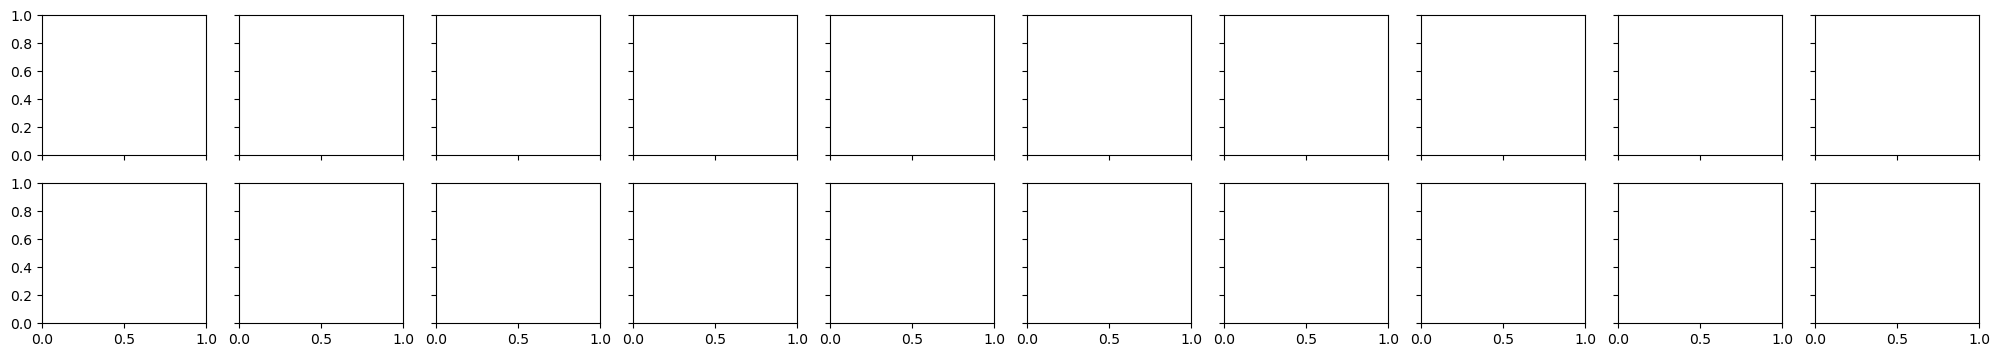

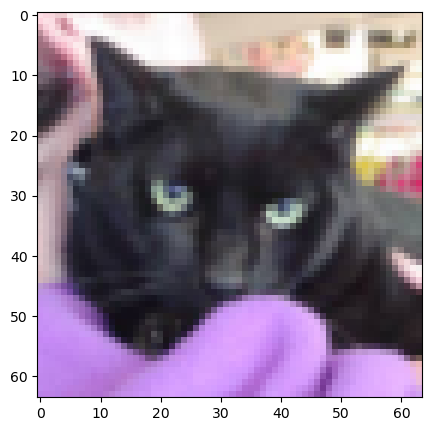

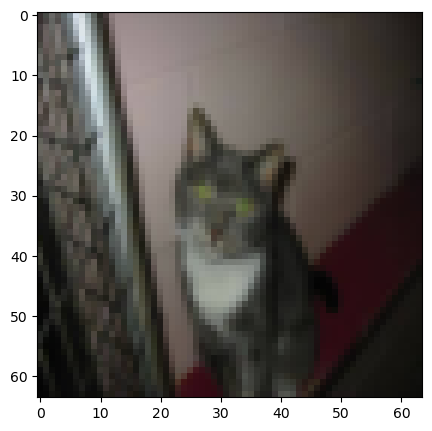

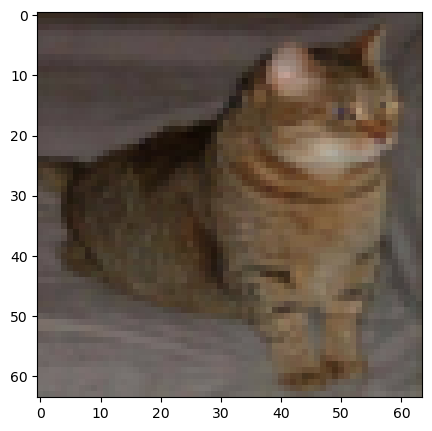

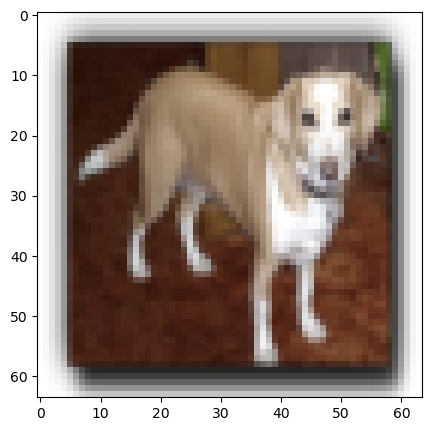

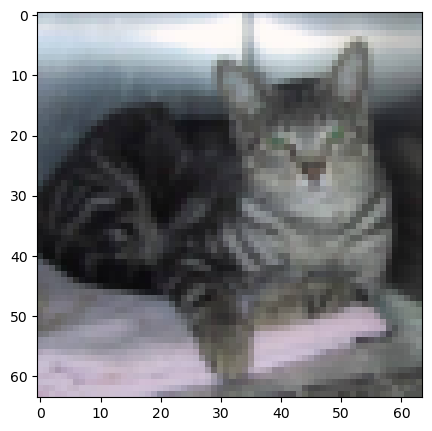

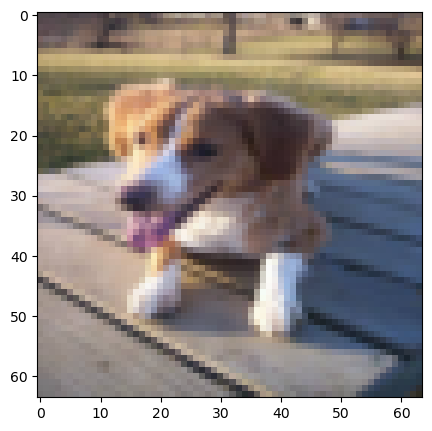

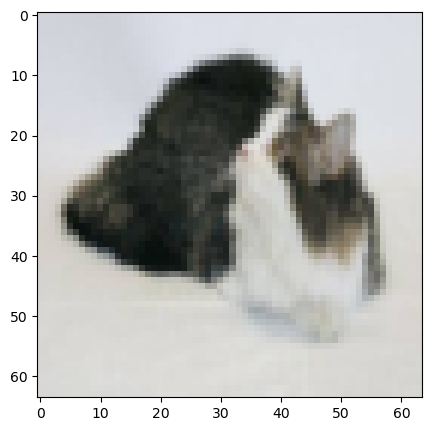

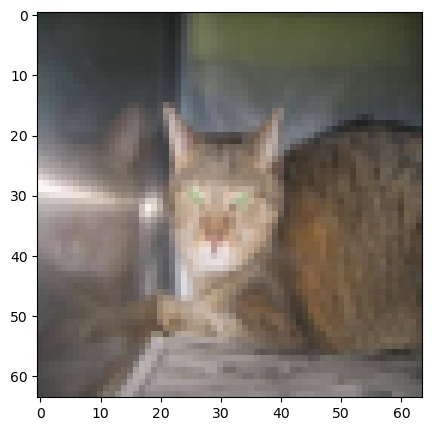

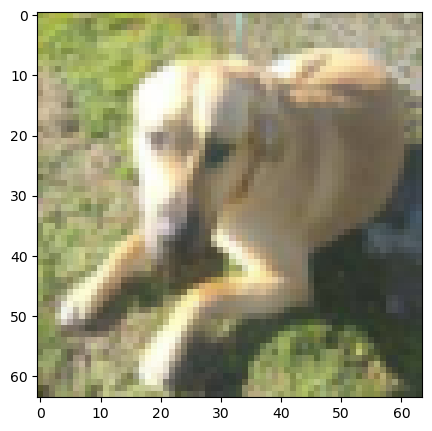

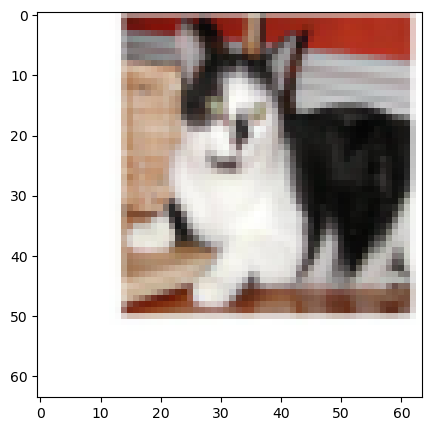

In [17]:
# obtain one batch of test images
dataiter = iter(train_loader)
images, labels = next(dataiter)
# images, labels = images.cuda(), labels.cuda()

images_flatten = images.view(images.size(0), -1).to(torch.device(device))
# get sample outputs
output = model(images_flatten)
# prep images for display
images = images.numpy()
# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for i in range(0, 10):
    img = np.squeeze(images[i])
    img = img.transpose(1, 2, 0)
    fig = plt.figure(figsize = (5,5)) 
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    if i<0.5:
        print('cat')
    else:
        print('dog')
    print(output[i])

In [ ]:
torch.save(model.state_dict(),'C:/Users/SWANNT/Cats and Dogs/Test_1Model')